In [ ]:
# web scraping - otoeksper.com 

In [44]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
import time

In [45]:
chrome_driver_path = "/Users/zehragul/Documents/Development/chromedriver"
service = ChromeService(executable_path=chrome_driver_path)
driver = webdriver.Chrome(service=service)

In [46]:
def scroll_down():
    for j in range(2):
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")  # Kaydırma İşlemi
        time.sleep(1)  # Her kaydırma işleminden sonra 1 saniye bekle


In [47]:
# create page list to visit
links_list = []
page_list = []
first_page = 'https://www.otoeksper.com.tr/ikinci-el'
page_list.append(first_page)
for i in range(2, 10):
    link = first_page + '?sayfa=' + str(i)
    page_list.append(link)
    print(link)
print(len(page_list))

# visit each page to collect car's link
for page in (page_list):

    driver.get(page)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    links = soup.find_all(name="div", class_="Arac-Foto")

    for link in links:
        item_link = "https://www.otoeksper.com.tr" + link.find('a', class_='Arac-Ozellik Resim').get('href')
        if item_link not in links_list:
            links_list.append(item_link)
        
print(links_list)
print(f"link sayisi :  {len(links_list)}")

https://www.otoeksper.com.tr/ikinci-el?sayfa=2
https://www.otoeksper.com.tr/ikinci-el?sayfa=3
https://www.otoeksper.com.tr/ikinci-el?sayfa=4
https://www.otoeksper.com.tr/ikinci-el?sayfa=5
https://www.otoeksper.com.tr/ikinci-el?sayfa=6
https://www.otoeksper.com.tr/ikinci-el?sayfa=7
https://www.otoeksper.com.tr/ikinci-el?sayfa=8
https://www.otoeksper.com.tr/ikinci-el?sayfa=9
9
['https://www.otoeksper.com.tr/ikinci-el-hyundai/i20/i20-1.2-team/benzinli/detay-71730', 'https://www.otoeksper.com.tr/ikinci-el-hyundai/i20/i20-1.2-d-cvvt-jump/benzinli/detay-71712', 'https://www.otoeksper.com.tr/ikinci-el-fiat/linea/linea-1.4-fire-actual/benzinli/detay-71756', 'https://www.otoeksper.com.tr/ikinci-el-volkswagen/polo/polo-1.4-comfortline/benzinli/lpg/detay-71710', 'https://www.otoeksper.com.tr/ikinci-el-fiat/linea/linea-1.3-multijet-active-plus/dizel/detay-71700', 'https://www.otoeksper.com.tr/ikinci-el-fiat/linea/linea-1.3-multijet-active-plus/dizel/detay-71759', 'https://www.otoeksper.com.tr/ikin

In [49]:
result = []
for link in links_list:

    driver.get(link)
    driver.implicitly_wait(2)
    scroll_down()


    try:
        fiyat = driver.find_element(by=By.XPATH, value='//*[@id="SatisFiyati"]').text
        fiyat = int(fiyat.replace(".", ""))
    except:
        fiyat = np.nan
    try:
        yil = int(driver.find_element(by=By.XPATH, value='//*[@id="ModelYili"]').text)
    except:
        yil = np.nan
    try:
        marka = driver.find_element(by=By.XPATH, value='//*[@id="KategoriAdi"]').text
    except:
        marka = np.nan
    try:
        seri = driver.find_element(by=By.XPATH, value='//*[@id="DetayAdi"]').text
    except:
        seri = np.nan
    try:
        model = driver.find_element(by=By.XPATH, value='//*[@id="AltKategoriAdi"]').text
    except:
        model = np.nan

    try:
        kilometre = int(driver.find_element(by=By.XPATH, value='//*[@id="Km"]').text.replace(".","").strip())
    except:
        kilometre = np.nan
    try:
        vites_tipi = driver.find_element(by=By.XPATH, value='//*[@id="VitesTipiAdi"]').text
    except:
        vites_tipi = np.nan
    try:
        yakit_tipi = driver.find_element(by=By.XPATH, value='//*[@id="YakitTipiAdi"]').text
    except:
        yakit_tipi = np.nan
    try:
        motor_hacmi = float(driver.find_element(by=By.XPATH, value='//*[@id="MotorHacmi"]').text.replace("cc","").strip())
    except:
        motor_hacmi = np.nan
    try:
        motor_gucu = float(driver.find_element(by=By.XPATH, value='//*[@id="MotorGucu"]').text.split(" ")[0])
    except:
        motor_gucu = np.nan

    try:
        cekis = driver.find_element(by=By.XPATH, value='//*[@id="TeknikOzellikTableDinamik"]/div[20]/span[3]').text
    except:
        cekis = np.nan

    try:
        yakit_deposu = float(driver.find_element(by=By.XPATH, value='//*[@id="TeknikOzellikTableDinamik"]/div[8]/span[3]').text.replace("lt","").strip())
    except:
        yakit_deposu = np.nan

    try:
        boyali_parca = driver.find_element(by=By.ID, value='EkspertizYazi').text.count("Boyalı")

    except:
        boyali_parca = np.nan

    try:
        degisen_parca = driver.find_element(by=By.ID, value='EkspertizYazi').text.count("Değişmiş")

    except:
        degisen_parca = np.nan

    new_row =[fiyat,yil, marka , seri , model, kilometre, vites_tipi, yakit_tipi, cekis, yakit_deposu, motor_hacmi, motor_gucu, boyali_parca, degisen_parca]
    result.append(new_row)


columns = ["fiyat", "yil", "marka", "seri", "model", "kilometre", "vites_tipi", "yakit_tipi", "cekis", "yakit_deposu", "motor_hacmi", "motor_gucu", "boyali_parca", "degisen_parca"]
df = pd.DataFrame.from_records(result, columns=columns)
# df.to_csv("otoeksper_cars.csv", index_label=False)
print(f"link sayisi :  {len(result)}")



driver.quit()

link sayisi :  162


In [308]:
df = pd.read_csv('otoeksper_cars.csv')

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240 entries, 0 to 1239
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fiyat          1240 non-null   int64  
 1   yil            1240 non-null   int64  
 2   marka          1240 non-null   object 
 3   seri           1240 non-null   object 
 4   model          1240 non-null   object 
 5   kilometre      1240 non-null   int64  
 6   vites_tipi     1240 non-null   object 
 7   yakit_tipi     1240 non-null   object 
 8   cekis          956 non-null    object 
 9   yakit_deposu   1111 non-null   float64
 10  motor_hacmi    1130 non-null   float64
 11  motor_gucu     1130 non-null   float64
 12  boyali_parca   1240 non-null   int64  
 13  degisen_parca  1240 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 145.3+ KB


In [310]:
df.isnull().sum()

fiyat              0
yil                0
marka              0
seri               0
model              0
kilometre          0
vites_tipi         0
yakit_tipi         0
cekis            284
yakit_deposu     129
motor_hacmi      110
motor_gucu       110
boyali_parca       0
degisen_parca      0
dtype: int64

In [311]:
df.yakit_tipi.value_counts()

Dizel           757
Benzinli        358
Benzinli/LPG    125
Name: yakit_tipi, dtype: int64

In [312]:
df['yakit_tipi'] = df['yakit_tipi'].apply(lambda x: x.replace('Benzinli/LPG','LPG & Benzin'))

In [313]:
df2=pd.read_csv('cars.csv')

In [314]:
df.yakit_tipi.value_counts()

Dizel           757
Benzinli        358
LPG & Benzin    125
Name: yakit_tipi, dtype: int64

In [315]:
df['yakit_tipi'] = df['yakit_tipi'].apply(lambda x: x.replace('Benzinli','Benzin'))

In [316]:
df.vites_tipi.value_counts()

Düz         1096
Otomatik     144
Name: vites_tipi, dtype: int64

In [317]:
df2.yakit_tipi.value_counts()

Dizel           1019
LPG & Benzin     655
Benzin           467
Hibrit             5
Elektrik           3
Sedan              3
Roadster           1
Name: yakit_tipi, dtype: int64

In [318]:
df2.vites_tipi.value_counts()

Düz              1297
Otomatik          445
Yarı Otomatik     405
LPG & Benzin        2
Benzin              1
Elektrik            1
Name: vites_tipi, dtype: int64

In [319]:
df.degisen_parca.value_counts()

0    855
1    159
2    110
3     65
4     29
5     11
8      6
7      2
6      2
9      1
Name: degisen_parca, dtype: int64

In [320]:
df.boyali_parca.value_counts()

0     683
2     134
1     125
3      99
4      67
6      33
5      33
7      19
8      17
10     10
9       7
12      6
11      4
13      3
Name: boyali_parca, dtype: int64

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1240 entries, 0 to 1239
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fiyat          1240 non-null   int64  
 1   yil            1240 non-null   int64  
 2   marka          1240 non-null   object 
 3   seri           1240 non-null   object 
 4   model          1240 non-null   object 
 5   kilometre      1240 non-null   int64  
 6   vites_tipi     1240 non-null   object 
 7   yakit_tipi     1240 non-null   object 
 8   cekis          956 non-null    object 
 9   yakit_deposu   1111 non-null   float64
 10  motor_hacmi    1130 non-null   float64
 11  motor_gucu     1130 non-null   float64
 12  boyali_parca   1240 non-null   int64  
 13  degisen_parca  1240 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 145.3+ KB


In [322]:
df.drop_duplicates()

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
0,150900,2010,Fiat,Albea Sole 1.3 Multijet Premio,Albea,229797,Düz,Dizel,Önden Çekiş,48.0,1.248,70.0,0,0
1,170900,2016,Fiat,Fiorino Cargo 1.3 Multijet,Fiorino,221283,Düz,Dizel,NaN,45.0,1.248,75.0,0,0
2,160900,2016,Fiat,Fiorino Cargo 1.3 Multijet,Fiorino,264528,Düz,Dizel,NaN,45.0,1.248,75.0,0,0
3,149900,2001,Renault,Kangoo 1.9 DCI 65 Hp,Kangoo,249790,Düz,Dizel,NaN,NaN,NaN,NaN,6,5
4,210000,2009,Peugeot,206 Sedan 1.4 Comfort,206,217000,Düz,Benzin,Önden Çekiş,50.0,1.360,75.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,320000,2017,Fiat,1.3 MultiJet Easy 95 Ps Sedan,Egea,76902,Düz,Dizel,Önden Çekiş,45.0,1.248,94.0,1,2
1236,246400,2011,Fiat,Doblo Combi 1.6 Multijet Premio,Doblo,216561,Düz,Dizel,Önden Çekiş,60.0,1.598,105.0,0,2
1237,170000,2004,Fiat,Doblo Cargo 1.9 JTD Active,Doblo,324877,Düz,Dizel,NaN,60.0,1.910,105.0,2,1
1238,265900,2012,Fiat,Linea 1.3 Multijet Active Plus,Linea,73500,Düz,Dizel,Önden Çekiş,45.0,1.248,95.0,4,3


In [323]:
df[df.cekis.isnull()]

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca
1,170900,2016,Fiat,Fiorino Cargo 1.3 Multijet,Fiorino,221283,Düz,Dizel,NaN,45.0,1.248,75.0,0,0
2,160900,2016,Fiat,Fiorino Cargo 1.3 Multijet,Fiorino,264528,Düz,Dizel,NaN,45.0,1.248,75.0,0,0
3,149900,2001,Renault,Kangoo 1.9 DCI 65 Hp,Kangoo,249790,Düz,Dizel,NaN,NaN,NaN,NaN,6,5
11,210000,2011,Peugeot,Bipper Kombi 1.4 HDi Connect Pack,Bipper,293942,Düz,Dizel,NaN,45.0,1.398,70.0,1,0
15,460000,2015,Ford,Tourneo Courier 1.5 TDCi Delux,Tourneo Courier,204600,Düz,Dizel,NaN,45.0,1.498,75.0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,459000,2021,Fiat,CROSS 1.4 FİRE URBAN,Egea,6500,Düz,Benzin,NaN,NaN,NaN,NaN,0,0
1224,332500,2021,Fiat,1.3 MultiJet Pop 95 Ps Combi,Fiorino,20,Düz,Dizel,NaN,45.0,1.248,94.0,0,0
1225,185000,2012,Fiat,Fiorino Combi 1.3 Multi Emotion,Fiorino,181000,Düz,Dizel,NaN,NaN,NaN,NaN,8,4
1228,459000,2021,Fiat,CROSS 1.4 FİRE URBAN,Egea,3700,Düz,Benzin,NaN,NaN,NaN,NaN,0,0


In [324]:
df.dropna(inplace=True)

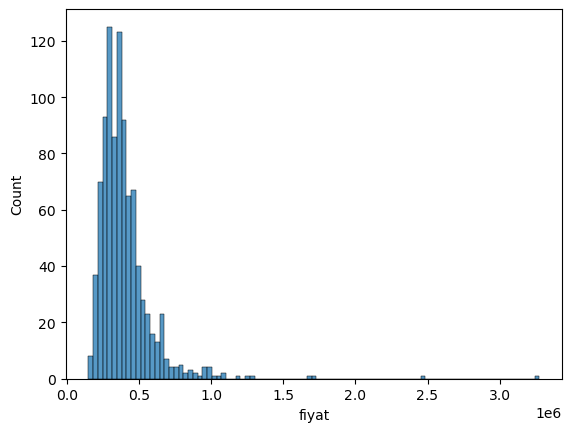

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot()
sns.histplot(data = df['fiyat']);

In [326]:
df['motor_hacmi']

0       1.248
4       1.360
5       1.364
6       1.368
7       1.398
        ...  
1234    1.248
1235    1.248
1236    1.598
1238    1.248
1239    1.598
Name: motor_hacmi, Length: 956, dtype: float64

In [327]:
def condition(x):
    if len(x)==3:
        x = x +'0'
        return x
    else:
        return x

In [328]:
df['motor_hacmi'] = df.motor_hacmi.astype(str)
df['motor_hacmi'] = df.motor_hacmi.apply(lambda x : x.replace(".",""))

In [329]:
df['motor_hacmi']

0       1248
4        136
5       1364
6       1368
7       1398
        ... 
1234    1248
1235    1248
1236    1598
1238    1248
1239    1598
Name: motor_hacmi, Length: 956, dtype: object

In [330]:
df['motor_hacmi'] = df.motor_hacmi.apply(condition)

In [331]:
df['motor_hacmi']

0       1248
4       1360
5       1364
6       1368
7       1398
        ... 
1234    1248
1235    1248
1236    1598
1238    1248
1239    1598
Name: motor_hacmi, Length: 956, dtype: object

In [332]:
df['fiyat_log'] = np.log(df.fiyat)

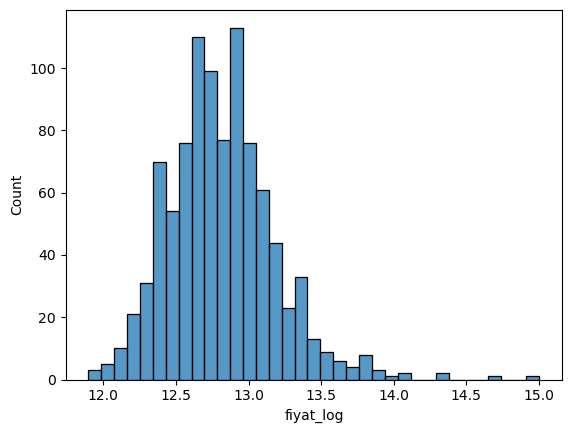

In [333]:
plt.plot()
sns.histplot(data = df['fiyat_log']);

In [334]:
df[df.fiyat<705150 ]

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca,fiyat_log
0,150900,2010,Fiat,Albea Sole 1.3 Multijet Premio,Albea,229797,Düz,Dizel,Önden Çekiş,48.0,1248,70.0,0,0,11.924373
4,210000,2009,Peugeot,206 Sedan 1.4 Comfort,206,217000,Düz,Benzin,Önden Çekiş,50.0,1360,75.0,2,0,12.254863
5,445750,2011,Toyota,Corolla Sedan 1.4 D-4D Comfort Extra M-M,Corolla,174035,Düz,Dizel,Önden Çekiş,55.0,1364,90.0,1,3,13.007514
6,205000,2008,Fiat,Albea Sole 1.4 Fire Dynamic,Albea,206000,Düz,LPG & Benzin,Önden Çekiş,48.0,1368,77.0,0,0,12.230765
7,402000,2012,Ford,Fiesta 1.4 TDCi Titanium,Fiesta,81108,Düz,Dizel,Önden Çekiş,45.0,1398,68.0,2,0,12.904207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,210000,2014,Fiat,Doblo Combi 1.3 M.jet Safeline,Doblo,196415,Düz,Dizel,Önden Çekiş,60.0,1248,90.0,3,2,12.254863
1235,320000,2017,Fiat,1.3 MultiJet Easy 95 Ps Sedan,Egea,76902,Düz,Dizel,Önden Çekiş,45.0,1248,94.0,1,2,12.676076
1236,246400,2011,Fiat,Doblo Combi 1.6 Multijet Premio,Doblo,216561,Düz,Dizel,Önden Çekiş,60.0,1598,105.0,0,2,12.414712
1238,265900,2012,Fiat,Linea 1.3 Multijet Active Plus,Linea,73500,Düz,Dizel,Önden Çekiş,45.0,1248,95.0,4,3,12.490876


In [335]:
df.fiyat.describe()

count    9.560000e+02
mean     3.968477e+05
std      2.012844e+05
min      1.469000e+05
25%      2.877500e+05
50%      3.554500e+05
75%      4.500000e+05
max      3.275900e+06
Name: fiyat, dtype: float64

In [336]:
df[df.fiyat>705150 ].count()

fiyat            40
yil              40
marka            40
seri             40
model            40
kilometre        40
vites_tipi       40
yakit_tipi       40
cekis            40
yakit_deposu     40
motor_hacmi      40
motor_gucu       40
boyali_parca     40
degisen_parca    40
fiyat_log        40
dtype: int64

In [337]:
df.yil = df.yil.apply(lambda x:2023-x)

In [338]:
df

,fiyat,yil,marka,seri,model,kilometre,vites_tipi,yakit_tipi,cekis,yakit_deposu,motor_hacmi,motor_gucu,boyali_parca,degisen_parca,fiyat_log
0,150900,13,Fiat,Albea Sole 1.3 Multijet Premio,Albea,229797,Düz,Dizel,Önden Çekiş,48.0,1248,70.0,0,0,11.924373
4,210000,14,Peugeot,206 Sedan 1.4 Comfort,206,217000,Düz,Benzin,Önden Çekiş,50.0,1360,75.0,2,0,12.254863
5,445750,12,Toyota,Corolla Sedan 1.4 D-4D Comfort Extra M-M,Corolla,174035,Düz,Dizel,Önden Çekiş,55.0,1364,90.0,1,3,13.007514
6,205000,15,Fiat,Albea Sole 1.4 Fire Dynamic,Albea,206000,Düz,LPG & Benzin,Önden Çekiş,48.0,1368,77.0,0,0,12.230765
7,402000,11,Ford,Fiesta 1.4 TDCi Titanium,Fiesta,81108,Düz,Dizel,Önden Çekiş,45.0,1398,68.0,2,0,12.904207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,210000,9,Fiat,Doblo Combi 1.3 M.jet Safeline,Doblo,196415,Düz,Dizel,Önden Çekiş,60.0,1248,90.0,3,2,12.254863
1235,320000,6,Fiat,1.3 MultiJet Easy 95 Ps Sedan,Egea,76902,Düz,Dizel,Önden Çekiş,45.0,1248,94.0,1,2,12.676076
1236,246400,12,Fiat,Doblo Combi 1.6 Multijet Premio,Doblo,216561,Düz,Dizel,Önden Çekiş,60.0,1598,105.0,0,2,12.414712
1238,265900,11,Fiat,Linea 1.3 Multijet Active Plus,Linea,73500,Düz,Dizel,Önden Çekiş,45.0,1248,95.0,4,3,12.490876


In [339]:
df.to_csv('clean_otoeksper.csv', index=False)